In [115]:
import pandas as pd
import numpy as np
from mlgear.utils import show
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [116]:
battlegrounds = ['Georgia', 'Texas', 'Ohio', 'Michigan', 'Pennsylvania', 'Maine', 'Iowa', 'South Carolina',
                 'North Carolina', 'Florida', 'Colorado', 'Nebraska', 'Arizona', 'Alaska', 'New Mexico',
                 'Nevada', 'National', 'Wisconsin']

def plot_polls(polls, grouper, election='president', year=2020, day_filter=30, count_filter=10,
               states=battlegrounds, show_bias=False, verbose=True):
    if not isinstance(grouper, list):
        grouper = [grouper]
    
    disp = polls[(polls['days_until'] < day_filter)]
    
    if year == 'all':
        year_label = 'all years'
    else:
        disp = disp[(disp['year'] == year)]
        year_label = year
        
    if election == 'all':
        election_label = 'all elections'
    else:
        election_label = election.title()
        disp = disp[(disp['election'] == election)]
        
    if states != 'all':
        disp = disp[(disp['state'].isin(states))]

    disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])
    
    if election != 'all':
        grouper = ['election'] + grouper
    
    disp = disp.groupby(grouper)
    disp = disp[['polled_margin', 'actual_margin', 'margin_diff', 'margin_abs_diff2']]
    disp = disp.agg(['mean', 'std', 'count']).reset_index()
    disp.columns = grouper + ['polled_margin_mean', 'polled_margin_std', 'polled_margin_count',
                   'actual_margin_mean', 'actual_margin_count', 'actual_margin_std', 'margin_diff_mean',
                   'margin_diff_std', 'margin_diff_count', 'margin_abs_diff2_mean', 'margin_abs_diff2_std',
                   'margin_abs_diff2_count']
    disp = disp[disp['margin_abs_diff2_count'] > count_filter]
    
    if show_bias:
        var = 'margin_diff'
        title = 'Average Difference Between Polled and Actual Margin for'
    else:
        var = 'margin_abs_diff2'
        title = 'Average Absolute Difference Between Polled and Actual Margin for'
        
    if disp.shape[0] > 0 and verbose:
        show(disp.sort_values(var + '_mean', ascending=False)[grouper + ['polled_margin_mean',
                                                                         'actual_margin_mean', 'margin_diff_mean',
                                                                         'polled_margin_count']].reset_index(drop=True),
             max_rows=None)

        if len(grouper) == 2:
            disp = disp.sort_values([grouper[0], var + '_mean'])
        else:
            disp = disp.sort_values(var + '_mean')
        meanx = disp[var + '_mean'].values
        stdx = disp[var + '_std'].values
        nx = disp[var + '_count'].values
        labels = [l + ' (N={})'.format(nx[i]) for i, l in enumerate([' '.join(x) for x in disp[grouper].values])]
        cis_80 = 1.282 * (stdx / np.sqrt(nx))
        x_pos = [i for i, _ in enumerate(labels)]

        plt.figure(figsize=(20, int(len(labels))))
        for zone in ['ytick', 'xtick']:
            plt.rc(zone, labelsize=14)
            
        plt.barh(x_pos, meanx, color='green', xerr=cis_80)
        plt.yticks(x_pos, labels)
        plt.xlabel('{} {} {} {}'.format(title, election_label, year_label, '(lower = better)' if 'abs' in var else ''),
                   fontsize=14)
        plt.show()

## Load Polls

In [117]:
polls = pd.read_csv('polls.csv')
polls

,election,state,year,stage,dem_candidate,pollster,N,methodology,population,days_until,...,dem_actual,rep_actual,ind_actual,dem_diff,rep_diff,polled_margin,actual_margin,margin_diff,margin_abs_diff,538grade_simple
0,president,Alabama,2004,general,NoName,SurveyUSA,735,Unknown,Unknown,6,...,37.099698,62.900302,-1.0,3.900302,-3.900302,-18.0,-25.800604,7.800604,7.800604,Unknown
1,president,Alabama,2004,general,NoName,Capital Survey,645,Unknown,Unknown,19,...,37.099698,62.900302,-1.0,0.900302,-0.900302,-24.0,-25.800604,1.800604,1.800604,Unknown
2,president,Alabama,2004,general,NoName,SurveyUSA,699,Unknown,Unknown,30,...,37.099698,62.900302,-1.0,-1.099698,1.099698,-28.0,-25.800604,-2.199396,2.199396,Unknown
3,president,Alabama,2004,general,NoName,Mobile Register,619,Unknown,Unknown,33,...,37.099698,62.900302,-1.0,-5.599698,5.599698,-37.0,-25.800604,-11.199396,11.199396,Unknown
4,president,Alabama,2004,general,NoName,ARG,699,Unknown,Unknown,47,...,37.099698,62.900302,-1.0,5.900302,-5.900302,-14.0,-25.800604,11.800604,11.800604,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27114,governor,Louisiana,2019,general,Edwards,Cygnal,800,IVR/Online/Live/Text,Unknown,8,...,51.330000,48.670000,0.0,-0.230000,0.230000,2.2,2.660000,-0.460000,0.460000,B
27115,governor,Louisiana,2019,general,Edwards,Targoz Market Research,640,Online,Unknown,6,...,51.330000,48.670000,0.0,0.670000,-0.670000,4.0,2.660000,1.340000,1.340000,C
27116,governor,Louisiana,2019,general,Edwards,Edgewater Research/My People Vote,661,IVR,Unknown,5,...,51.330000,48.670000,0.0,-1.180000,1.180000,0.3,2.660000,-2.360000,2.360000,C
27117,governor,Louisiana,2019,general,Edwards,JMC Analytics,600,IVR/Live/Text,Unknown,3,...,51.330000,48.670000,0.0,-1.080000,1.080000,0.5,2.660000,-2.160000,2.160000,C


## 538 Grade

## President 2020 ##
    election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0  president               A            3.887755           -1.263561   
1  president               B            3.540411           -0.915682   
2  president               C            3.385036           -0.798578   
3  president             D/F            2.895833           -1.169520   

   margin_diff_mean  polled_margin_count  
0          5.151317                   98  
1          4.456093                  146  
2          4.183614                  139  
3          4.065353                  192  
(4, 6)


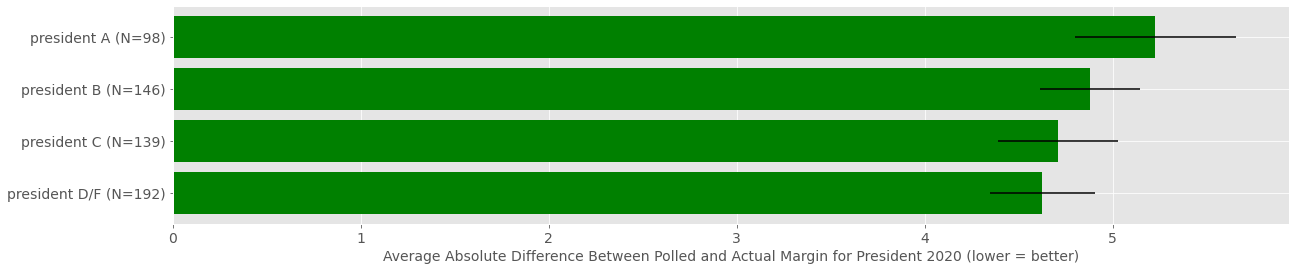

-
## Senate 2020 ##
  election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   senate             D/F            4.254286           -2.651643   
1   senate               A            2.864262           -3.079742   
2   senate               B            2.659677           -2.420833   
3   senate               C            3.940909           -1.087799   

   margin_diff_mean  polled_margin_count  
0          6.905929                   35  
1          5.944004                   61  
2          5.080510                   62  
3          5.028708                   66  
(4, 6)


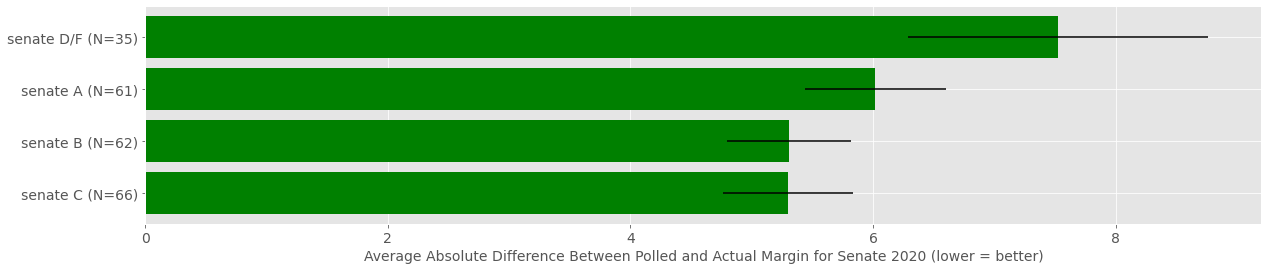

-
## Governor 2020 ##
-
## Gcb 2020 ##
  election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0      GCB               B            9.500000            3.100000   
1      GCB               C            7.003478            3.100000   

   margin_diff_mean  polled_margin_count  
0          6.400000                   16  
1          3.903478                   46  
(2, 6)


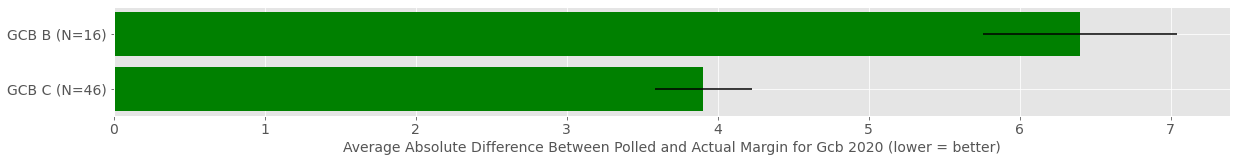

-
## President 2018 ##
-
## Senate 2018 ##
  election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   senate               C            1.255372            2.112392   
1   senate               A            2.536744            2.174037   
2   senate               B            5.630545            4.486278   
3   senate             D/F            2.258065            3.726216   

   margin_diff_mean  polled_margin_count  
0         -0.857020                  121  
1          0.362707                   43  
2          1.144267                   55  
3         -1.468151                   31  
(4, 6)


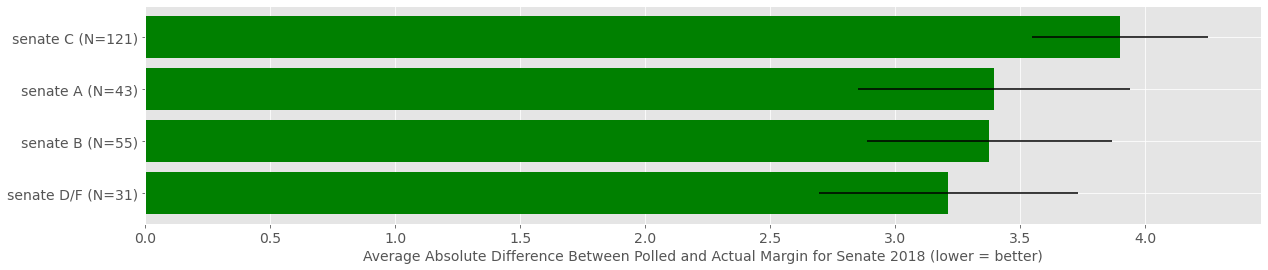

-
## Governor 2018 ##
   election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0  governor             D/F            1.976923            3.000769   
1  governor               C            0.058163           -0.773061   
2  governor               B            0.162963            0.435556   
3  governor               A            0.949000           -0.790500   

   margin_diff_mean  polled_margin_count  
0         -1.023846                   13  
1          0.831224                   49  
2         -0.272593                   27  
3          1.739500                   20  
(4, 6)


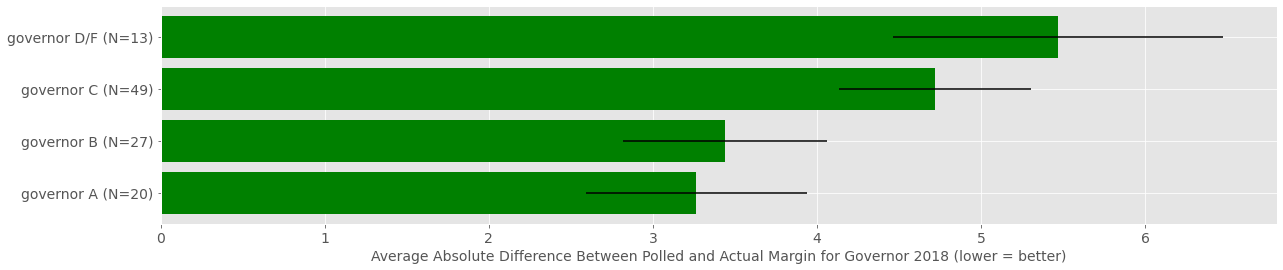

-
## Gcb 2018 ##
  election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0      GCB               C            7.358209            8.600000   
1      GCB               B            7.144928            8.600000   
2      GCB               A            8.400000            8.600000   

   margin_diff_mean  polled_margin_count  
0         -1.241791                   67  
1         -1.455072                   69  
2         -0.200000                   19  
(3, 6)


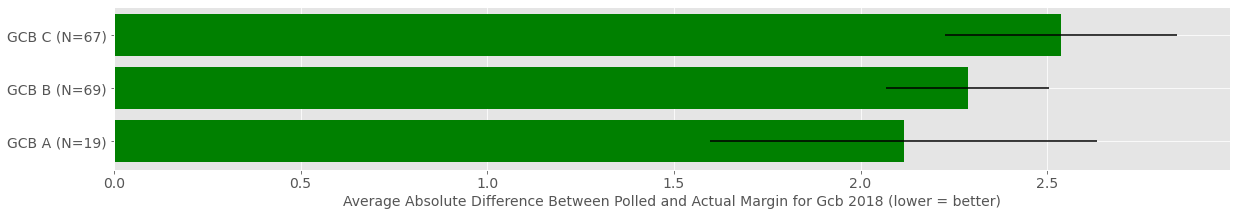

-
## President 2016 ##
    election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0  president               C            1.537632           -1.878816   
1  president             D/F            0.331447           -2.606447   
2  president               B            1.101923           -2.432500   
3  president               A           -0.086486           -2.832162   

   margin_diff_mean  polled_margin_count  
0          3.416447                   76  
1          2.937895                   76  
2          3.534423                   52  
3          2.745676                   37  
(4, 6)


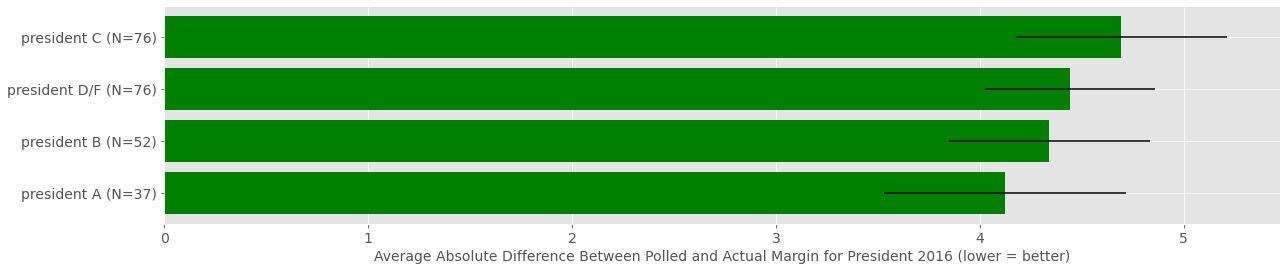

-
## Senate 2016 ##
  election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   senate             D/F           -5.066667           -8.827333   
1   senate               C           -1.243137           -4.972157   
2   senate               B           -3.700000           -7.699524   
3   senate               A           -5.370000           -6.919667   

   margin_diff_mean  polled_margin_count  
0          3.760667                   30  
1          3.729020                   51  
2          3.999524                   42  
3          1.549667                   30  
(4, 6)


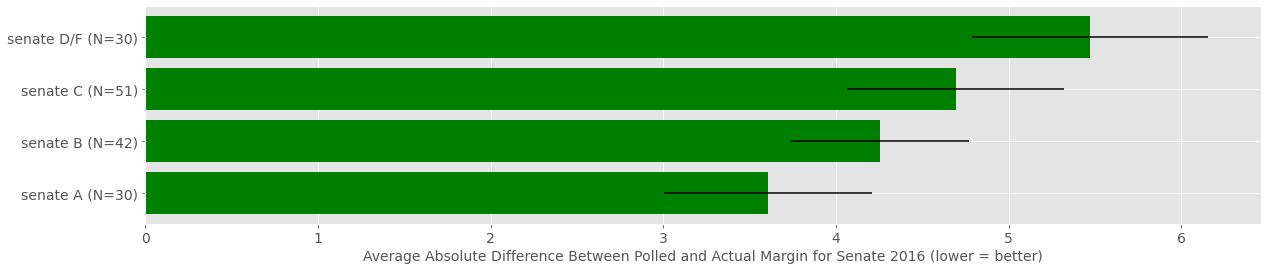

-
## Governor 2016 ##
-
## Gcb 2016 ##
-


In [118]:
for y in [2020, 2018, 2016]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'], grouper='538grade_simple', election=p, year=y)
        print('-')

## President 2020 ##
     election           state 538grade_simple  polled_margin_mean  \
0   president            Ohio               B            2.500000   
1   president       Wisconsin               A           10.185714   
2   president            Iowa               A            1.100000   
3   president            Iowa             D/F            0.333333   
4   president            Iowa               C           -0.250000   
5   president            Iowa               B           -0.275000   
6   president       Wisconsin             D/F            8.206667   
7   president         Florida               A            3.416667   
8   president        Nebraska             D/F          -12.375000   
9   president        Michigan               C            8.261538   
10  president       Wisconsin               B            7.200000   
11  president       Wisconsin               C            6.861538   
12  president         Florida               B            2.740000   
13  president

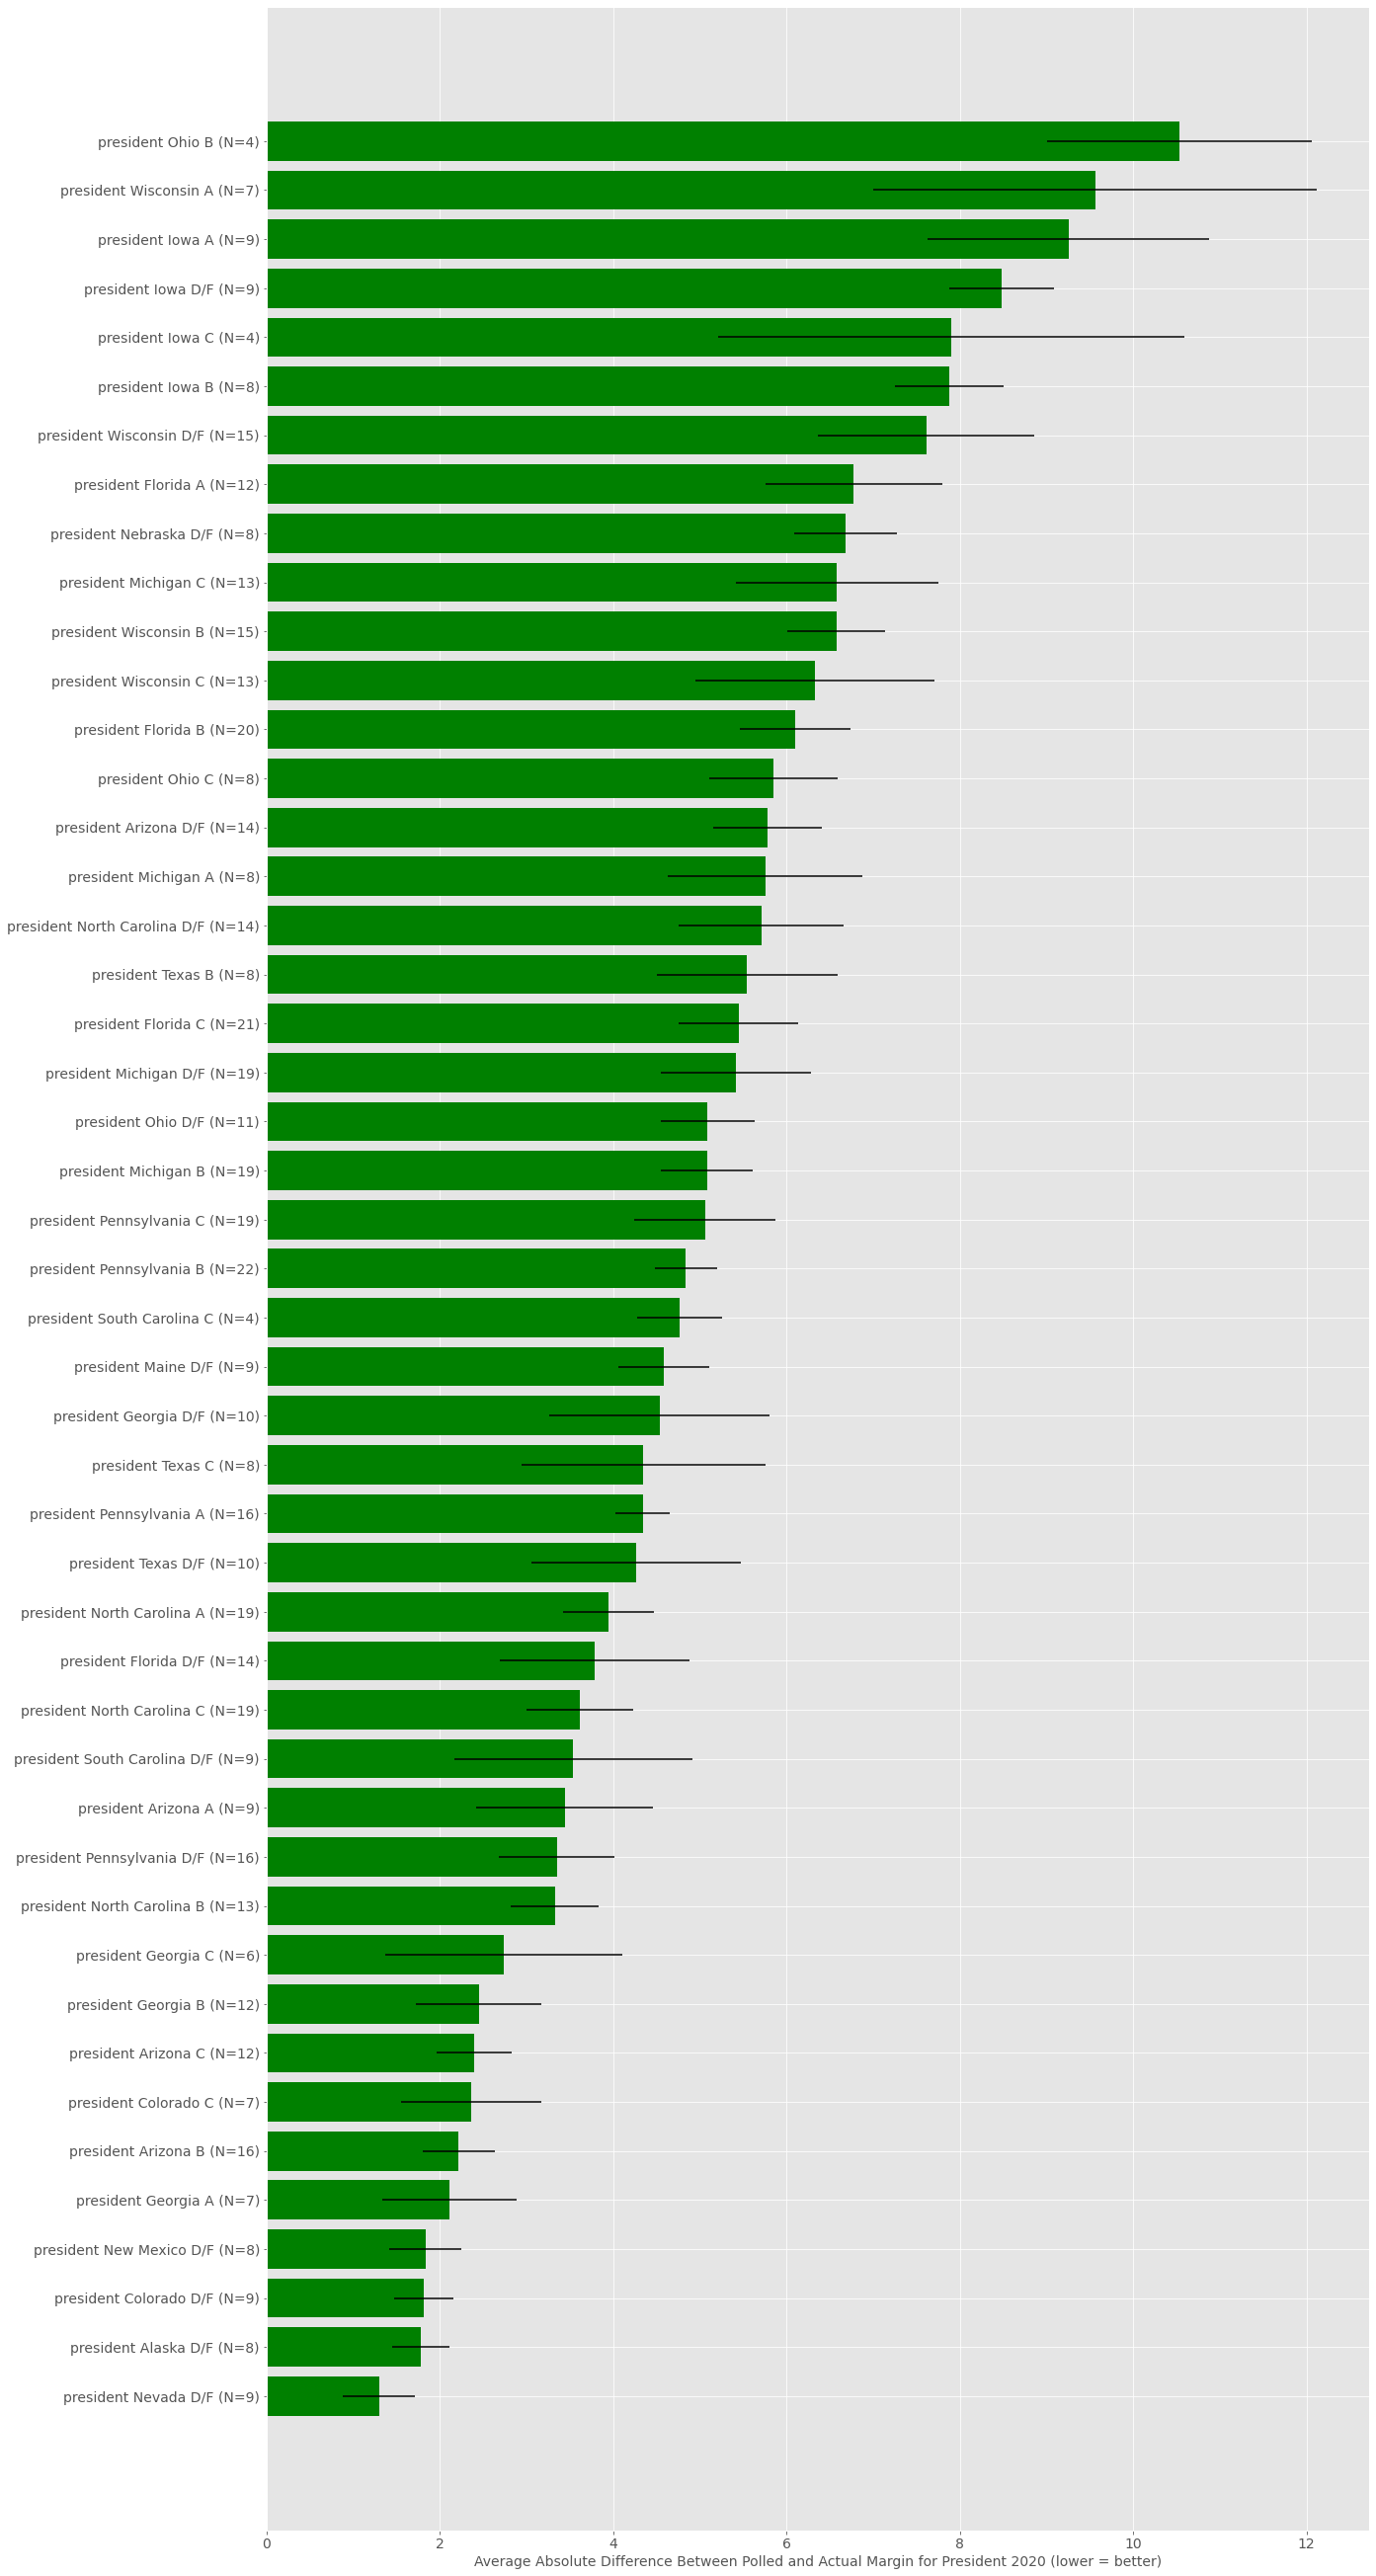

-
## Senate 2020 ##
   election           state 538grade_simple  polled_margin_mean  \
0    senate           Maine             D/F            6.000000   
1    senate           Maine               A            1.560000   
2    senate        Michigan               C            9.366667   
3    senate            Iowa               B            1.137500   
4    senate            Iowa               A            1.113333   
5    senate  South Carolina               C           -2.860000   
6    senate  North Carolina               A            4.378571   
7    senate         Arizona               B            7.662500   
8    senate        Michigan             D/F            5.711111   
9    senate  North Carolina               C            3.820000   
10   senate         Arizona             D/F            7.700000   
11   senate        Michigan               B            7.083333   
12   senate         Georgia               C            3.262500   
13   senate  North Carolina               

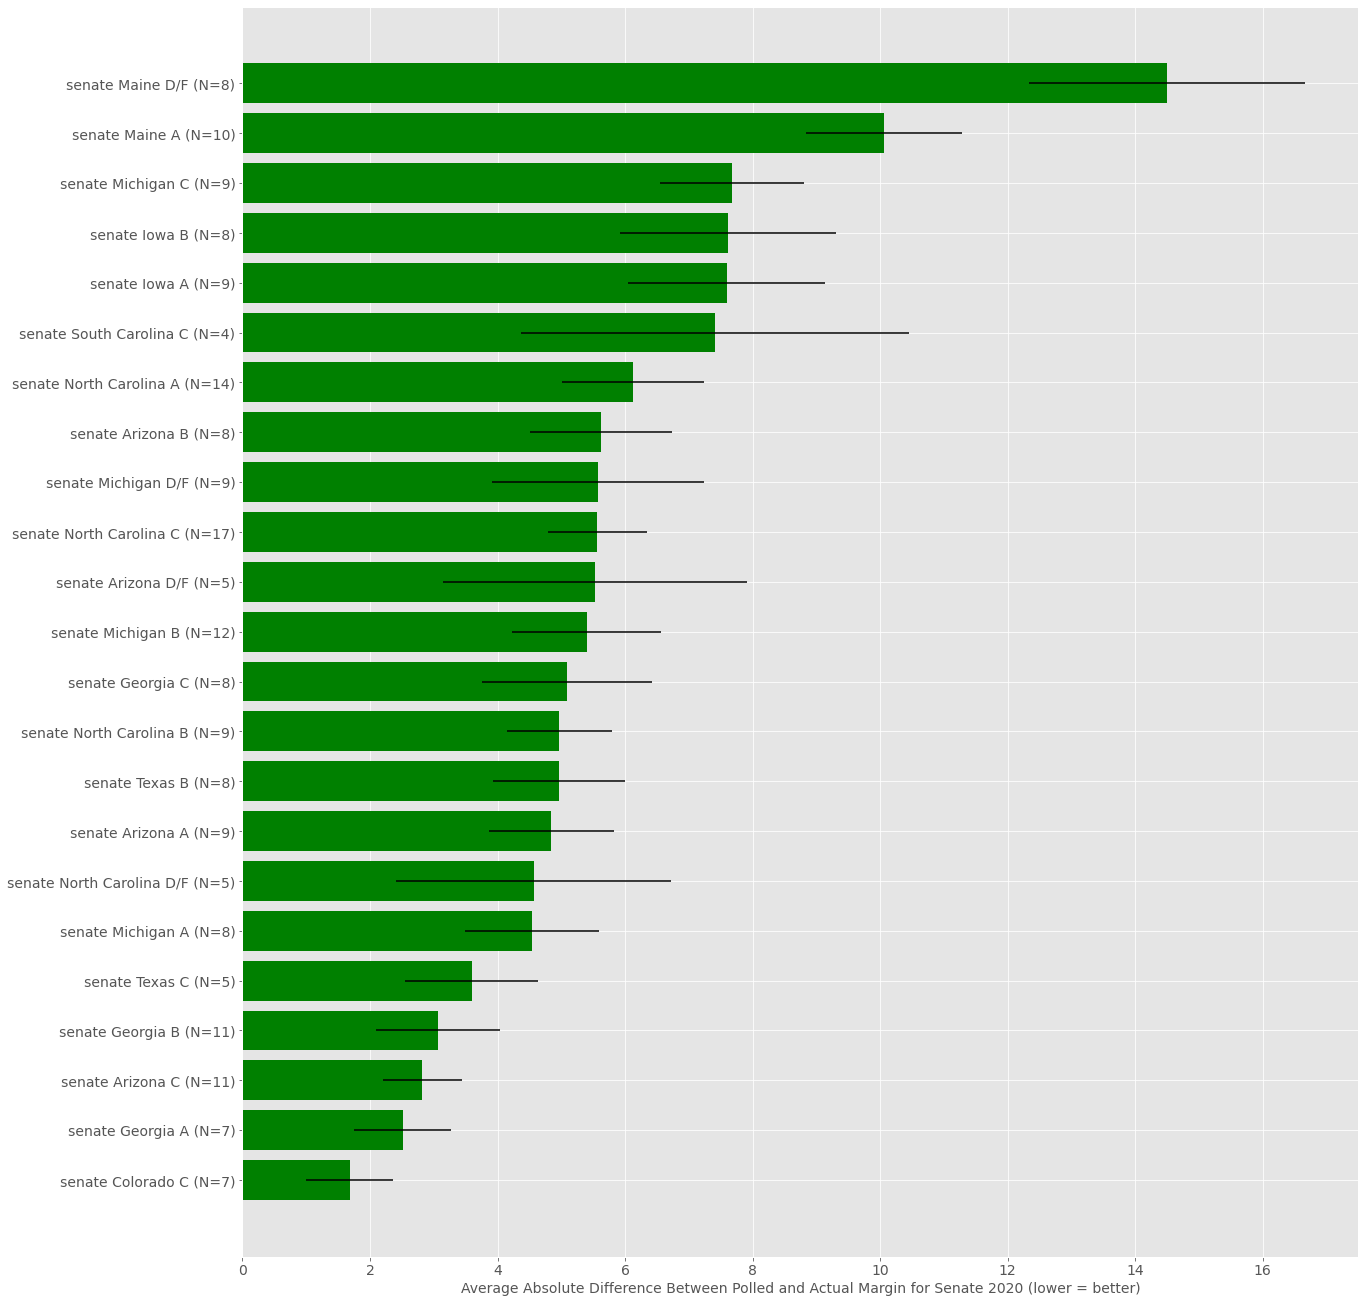

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
   election      state 538grade_simple  polled_margin_mean  \
0    senate       Ohio               C           14.250000   
1    senate     Nevada               B           -1.850000   
2    senate   Michigan               C           12.540000   
3    senate       Ohio               B           12.200000   
4    senate    Florida               A            5.116667   
5    senate    Arizona               C           -1.596000   
6    senate      Texas             D/F           -4.450000   
7    senate     Nevada               A            0.582000   
8    senate     Nevada               C            1.372222   
9    senate   Michigan               B           10.000000   
10   senate      Texas               C           -5.863636   
11   senate    Florida               B            3.114286   
12   senate    Arizona               B            3.452727   
13   senate      Texas               B           -5.300000   
14   

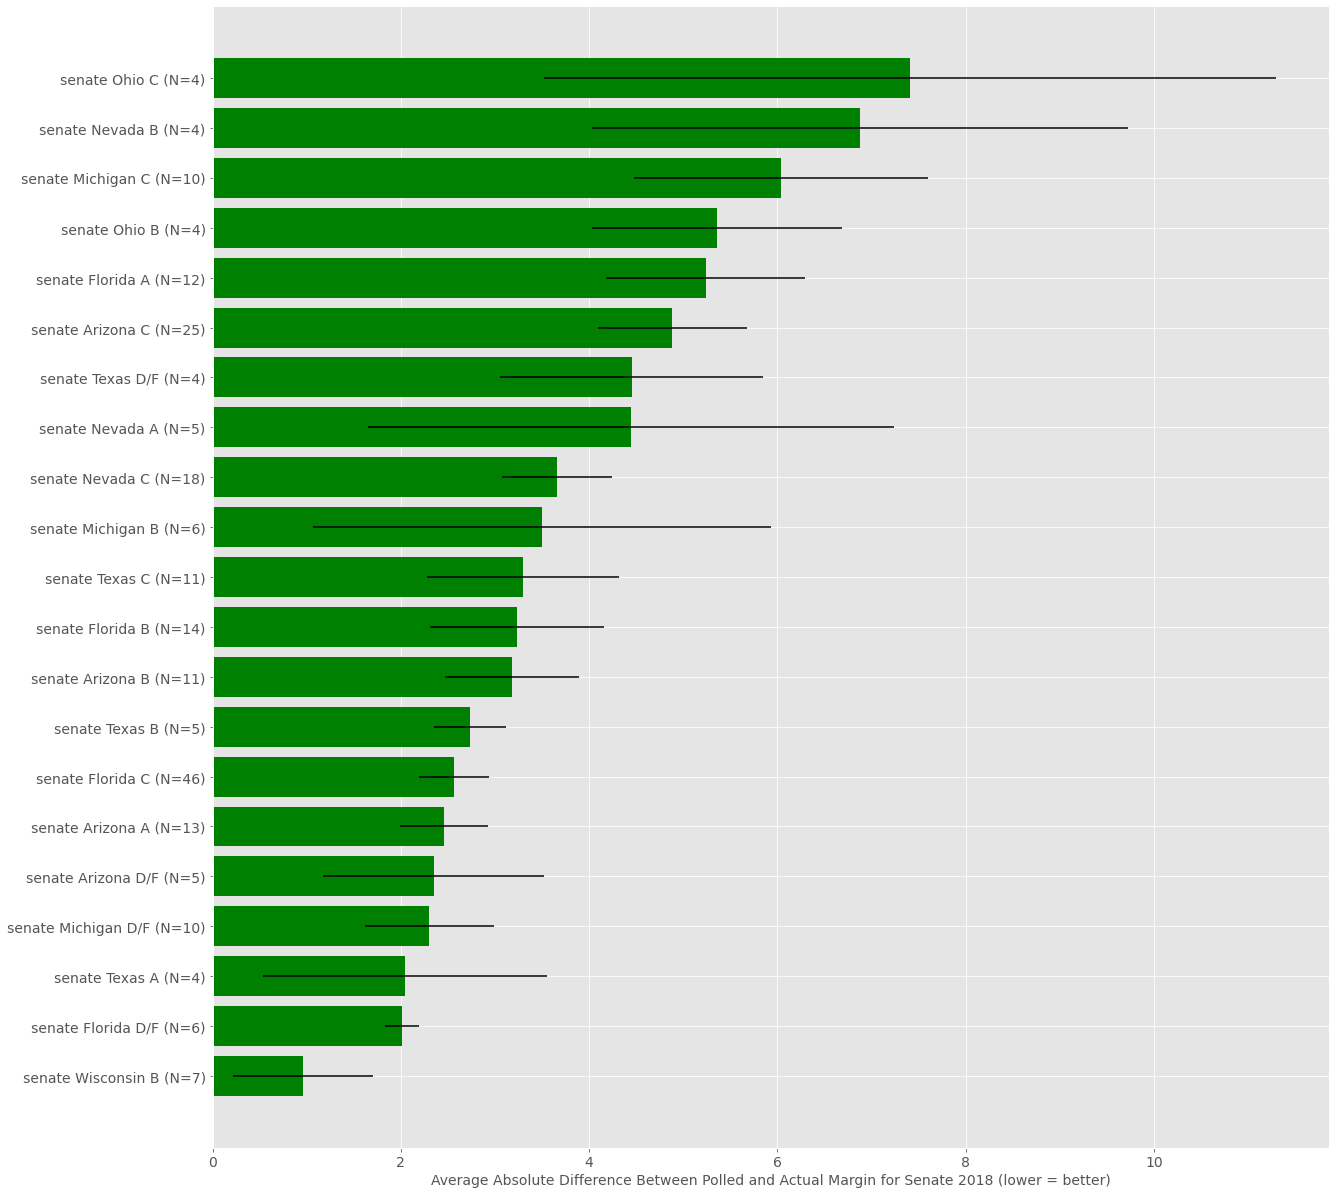

-
## Governor 2018 ##
   election     state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0  governor   Florida               A            4.336000           -0.400000   
1  governor   Arizona               C          -15.237500          -14.160000   
2  governor   Florida               B            3.771429           -0.400000   
3  governor   Florida               C            2.916667           -0.400000   
4  governor    Nevada               C            0.380000            4.080000   
5  governor  Michigan               C           10.250000            9.560000   
6  governor  Michigan             D/F            8.700000            9.560000   

   margin_diff_mean  polled_margin_count  
0          4.736000                    5  
1         -1.077500                    8  
2          4.171429                    7  
3          3.316667                   18  
4         -3.700000                    5  
5          0.690000                    4  
6         -0.860000         

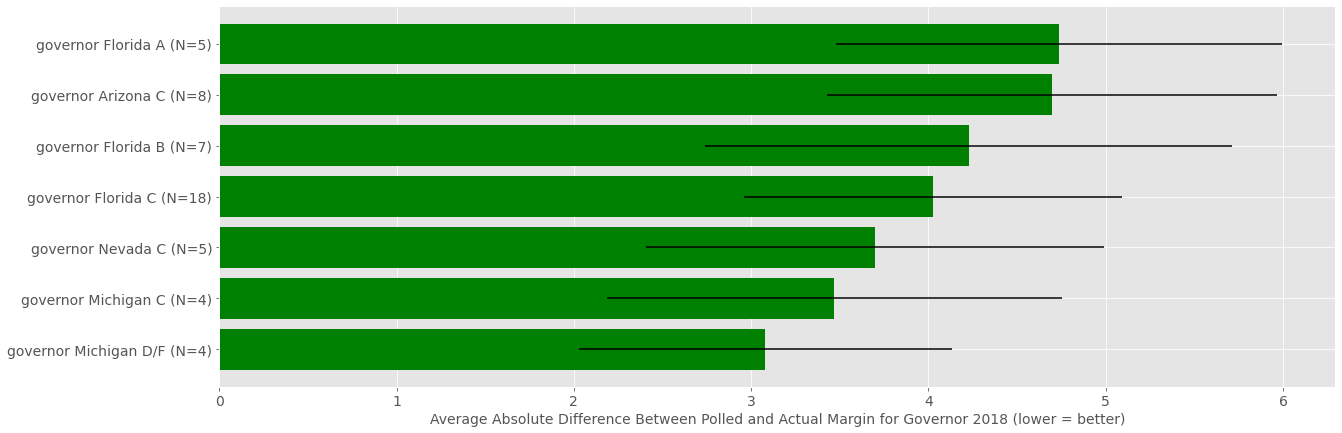

-


In [119]:
for y in [2020, 2018]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'],
                   grouper=['state', '538grade_simple'], election=p, year=y, count_filter=3)
        print('-')

    election 538grade_simple  polled_margin_mean  actual_margin_mean  \
0  president             D/F            8.206667            0.627100   
1  president               B            7.200000            0.627100   
2  president               C            6.861538            0.627100   

   margin_diff_mean  polled_margin_count  
0          7.579567                   15  
1          6.572900                   15  
2          6.234439                   13  
(3, 6)


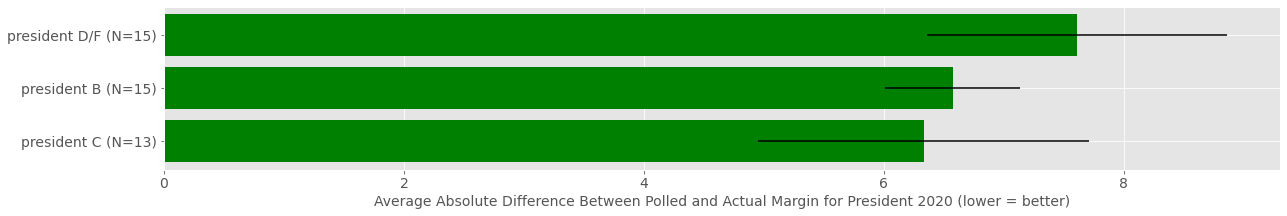

In [120]:
plot_polls(polls[(polls['538grade_simple'] != 'Unknown') & (polls['state'] == 'Wisconsin')],
           grouper='538grade_simple', election='president', year=2020)

In [121]:
plot_polls(polls[(polls['538grade_simple'] != 'Unknown') & (polls['state'] == 'Iowa')],
           grouper='538grade_simple', election='President', year=2020)

In [122]:
polls[polls['state'] == 'Wisconsin']

,election,state,year,stage,dem_candidate,pollster,N,methodology,population,days_until,...,dem_actual,rep_actual,ind_actual,dem_diff,rep_diff,polled_margin,actual_margin,margin_diff,margin_abs_diff,538grade_simple
754,president,Wisconsin,2004,general,NoName,Zogby,700,Unknown,Unknown,1,...,50.19188,49.80812,-1.0,2.80812,-2.80812,6.0,0.383761,5.616239,5.616239,Unknown
755,president,Wisconsin,2004,general,NoName,Strategic Vision (R),896,Unknown,Unknown,2,...,50.19188,49.80812,-1.0,-1.19188,1.19188,-2.0,0.383761,-2.383761,2.383761,Unknown
756,president,Wisconsin,2004,general,NoName,FOX News,799,Unknown,Unknown,2,...,50.19188,49.80812,-1.0,-1.69188,1.69188,-3.0,0.383761,-3.383761,3.383761,Unknown
757,president,Wisconsin,2004,general,NoName,CNN/USAT/Gallup,123,Unknown,Unknown,3,...,50.19188,49.80812,-1.0,-4.19188,4.19188,-8.0,0.383761,-8.383761,8.383761,Unknown
758,president,Wisconsin,2004,general,NoName,Mason-Dixon,724,Unknown,Unknown,4,...,50.19188,49.80812,-1.0,0.80812,-0.80812,2.0,0.383761,1.616239,1.616239,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26787,governor,Wisconsin,2018,general,Evers,Marquette University Law School,1154,Live Phone,Unknown,11,...,49.54000,48.44000,0.0,0.46000,1.56000,0.0,1.100000,-1.100000,1.100000,B
26914,senate,Wisconsin,2018,general,Baldwin,Emerson College,604,IVR/Online/Text,Unknown,7,...,55.36000,44.53000,0.0,-1.01000,1.12000,8.7,10.830000,-2.130000,2.130000,A
26928,governor,Wisconsin,2018,general,Evers,Emerson College,604,IVR/Online/Text,Unknown,7,...,49.54000,48.44000,0.0,2.86000,-0.84000,4.8,1.100000,3.700000,3.700000,A
27004,senate,Wisconsin,2018,general,Baldwin,Research Co.,450,Online,Unknown,4,...,55.36000,44.53000,0.0,0.14000,-0.03000,11.0,10.830000,0.170000,0.170000,B


## Partisan Bias

## President 2020 ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac            3.900000           -4.197883   
1  president      YouGov            4.864706            0.418059   
2  president   Trafalgar           -1.152632            0.170419   

   margin_diff_mean  polled_margin_count  
0          8.097883                   10  
1          4.446647                   17  
2         -1.323050                   19  
(3, 6)


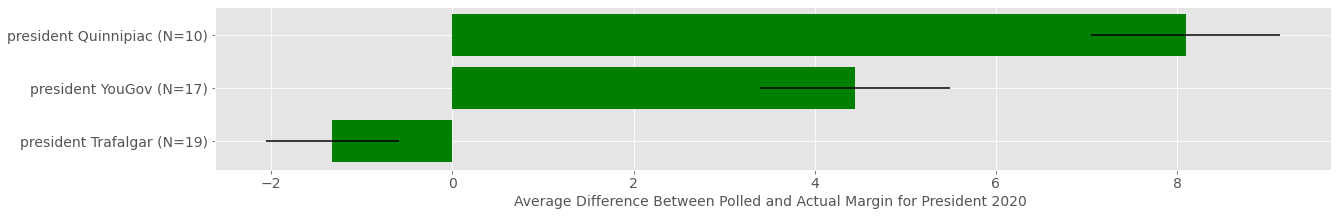

-
## Senate 2020 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate  Quinnipiac           -0.666667           -5.965530   
1   senate      YouGov            3.385714           -0.898309   
2   senate   Trafalgar           -0.875000            0.993006   

   margin_diff_mean  polled_margin_count  
0          5.298863                    3  
1          4.284024                    7  
2         -1.868006                    4  
(3, 6)


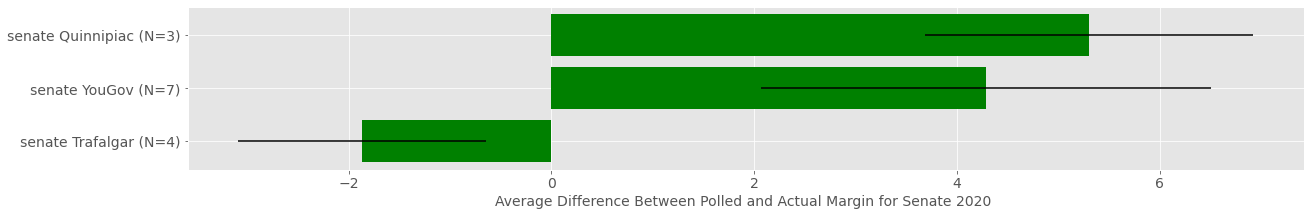

-
## Governor 2020 ##
-
## Gcb 2020 ##
  election pollster2  polled_margin_mean  actual_margin_mean  \
0      GCB    YouGov            9.500000            3.100000   

   margin_diff_mean  polled_margin_count  
0          6.400000                   16  
(1, 6)


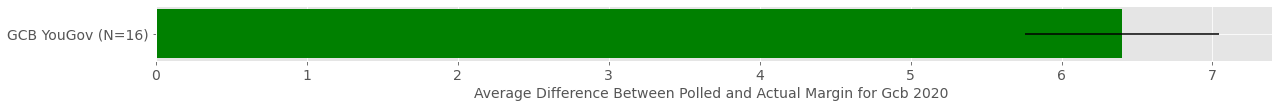

-
## President 2018 ##
-
## Senate 2018 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate  Quinnipiac            2.666667           -0.935375   
1   senate      YouGov           -1.000000           -0.112542   
2   senate   Trafalgar           -0.300000            1.917095   

   margin_diff_mean  polled_margin_count  
0          3.602042                    6  
1         -0.887458                    6  
2         -2.217095                   14  
(3, 6)


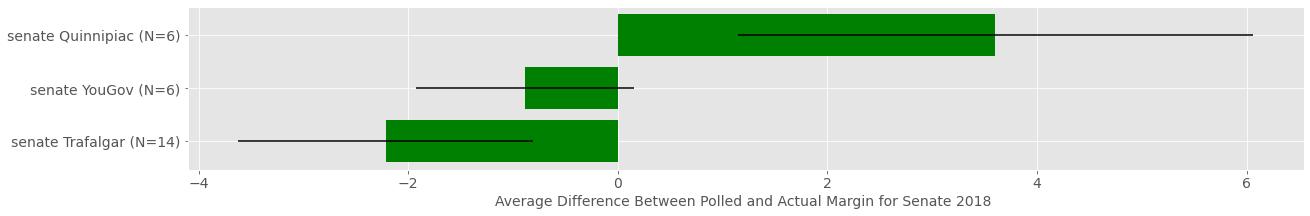

-
## Governor 2018 ##
   election   pollster2  polled_margin_mean  actual_margin_mean  \
0  governor  Quinnipiac           -0.333333           -4.700000   
1  governor      YouGov           -9.666667           -9.286667   
2  governor   Trafalgar           -4.683333           -1.643333   

   margin_diff_mean  polled_margin_count  
0          4.366667                    3  
1         -0.380000                    3  
2         -3.040000                    6  
(3, 6)


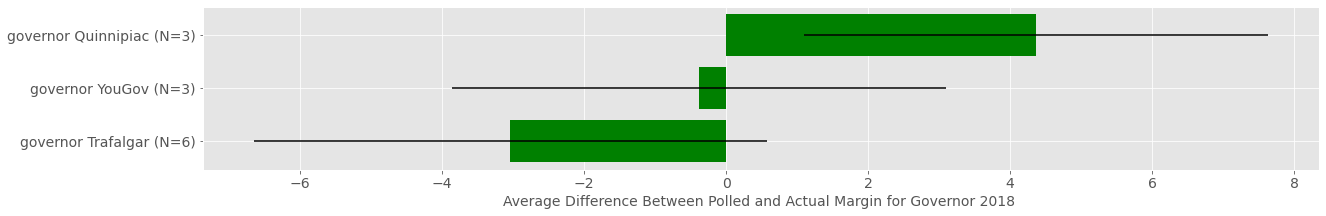

-
## Gcb 2018 ##
  election pollster2  polled_margin_mean  actual_margin_mean  \
0      GCB    YouGov            6.000000            8.600000   

   margin_diff_mean  polled_margin_count  
0         -2.600000                    5  
(1, 6)


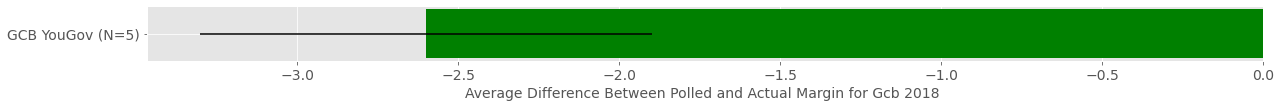

-
## President 2016 ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac            1.388889           -4.071111   
1  president      YouGov            0.363636           -3.379091   
2  president   Trafalgar           -3.451111           -1.422222   

   margin_diff_mean  polled_margin_count  
0          5.460000                    9  
1          3.742727                   11  
2         -2.028889                    9  
(3, 6)


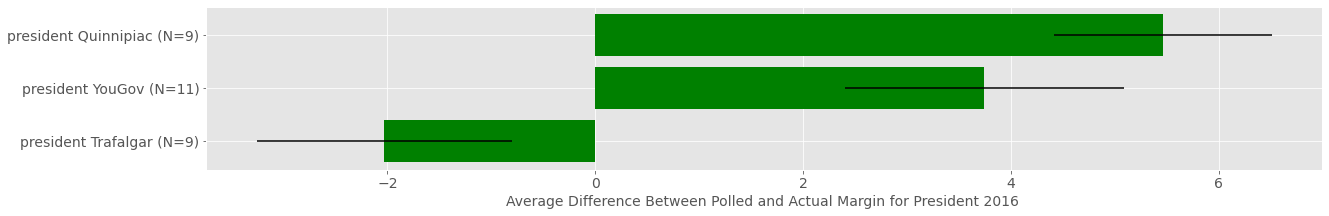

-
## Senate 2016 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate      YouGov           -2.333333           -7.312222   
1   senate  Quinnipiac           -6.555556          -10.321111   

   margin_diff_mean  polled_margin_count  
0          4.978889                    9  
1          3.765556                    9  
(2, 6)


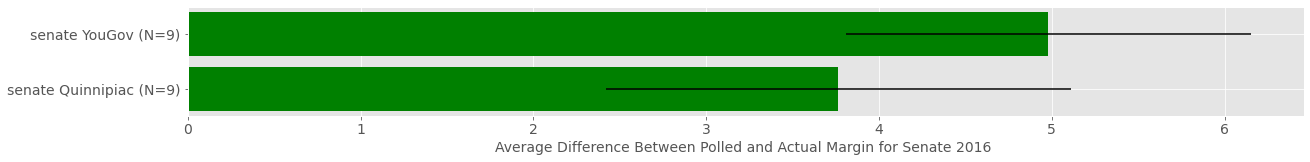

-
## Governor 2016 ##
   election   pollster2  polled_margin_mean  actual_margin_mean  \
0  governor  Quinnipiac            2.333333            0.220000   

   margin_diff_mean  polled_margin_count  
0          2.113333                    3  
(1, 6)


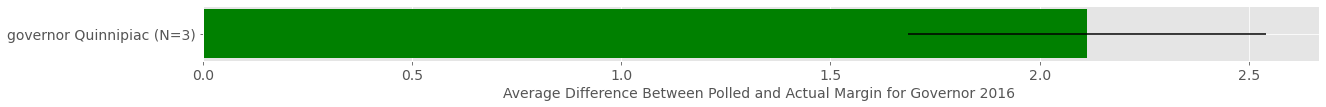

-
## Gcb 2016 ##
-
## President 2014 ##
-
## Senate 2014 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate      YouGov           -5.061905           -9.143333   
1   senate  Quinnipiac           -3.388889           -5.760000   

   margin_diff_mean  polled_margin_count  
0          4.081429                   21  
1          2.371111                    9  
(2, 6)


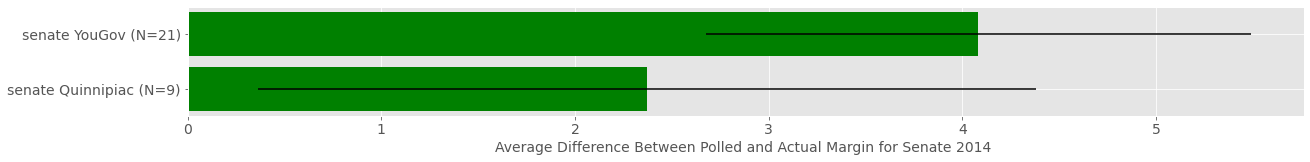

-
## Governor 2014 ##
   election   pollster2  polled_margin_mean  actual_margin_mean  \
0  governor      YouGov           -7.750000          -11.841500   
1  governor  Quinnipiac           -5.555556           -6.480000   

   margin_diff_mean  polled_margin_count  
0          4.091500                   20  
1          0.924444                    9  
(2, 6)


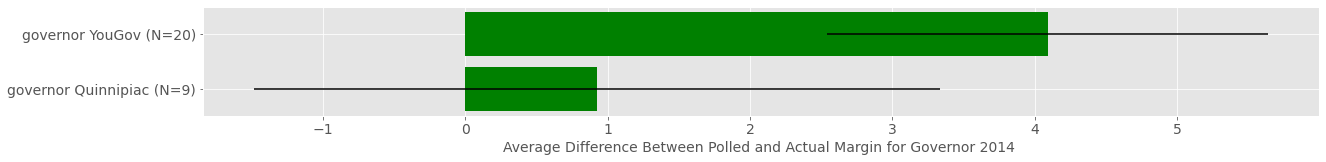

-
## Gcb 2014 ##
-
## President 2012 ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac            3.250000            3.225673   
1  president      YouGov           -0.423077            0.989084   

   margin_diff_mean  polled_margin_count  
0          0.024327                   12  
1         -1.412161                   52  
(2, 6)


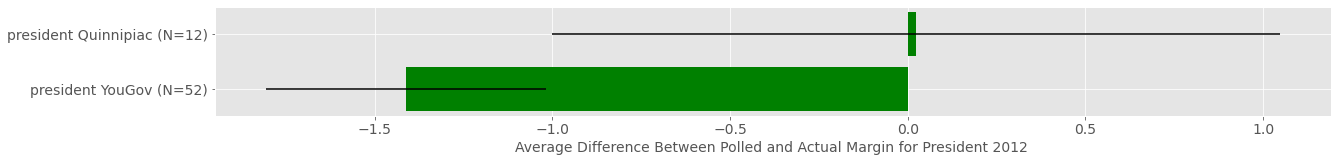

-
## Senate 2012 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate  Quinnipiac            8.909091            8.347236   
1   senate      YouGov           -0.200000            4.101753   

   margin_diff_mean  polled_margin_count  
0          0.561855                   11  
1         -4.301753                   35  
(2, 6)


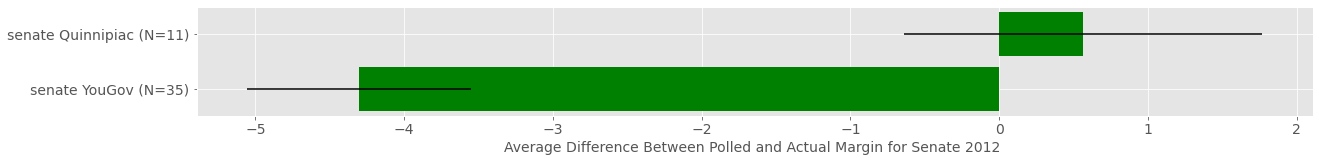

-
## Governor 2012 ##
-
## Gcb 2012 ##
-
## President 2008 ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac            9.222222            7.437630   
1  president      YouGov            1.514286            2.021262   

   margin_diff_mean  polled_margin_count  
0          1.784592                   45  
1         -0.506976                   35  
(2, 6)


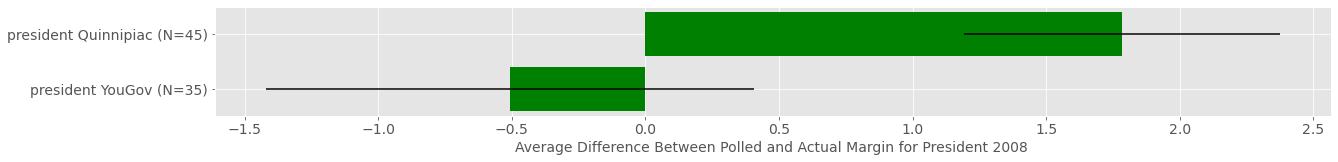

-
## Senate 2008 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate  Quinnipiac           11.000000           10.813058   
1   senate      YouGov            3.315789            4.137388   

   margin_diff_mean  polled_margin_count  
0          0.186942                    3  
1         -0.821599                   19  
(2, 6)


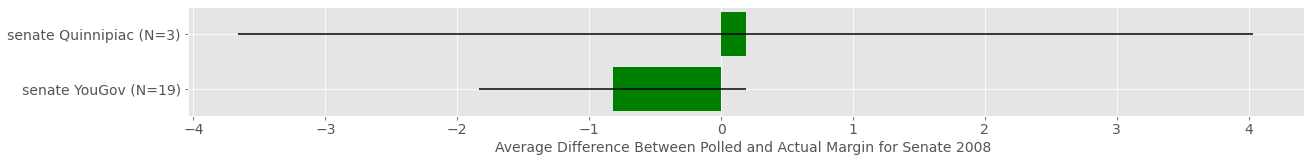

-
## Governor 2008 ##
-
## Gcb 2008 ##
-
## President 2004 ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac           -1.600000           -1.263506   

   margin_diff_mean  polled_margin_count  
0         -0.336494                   20  
(1, 6)


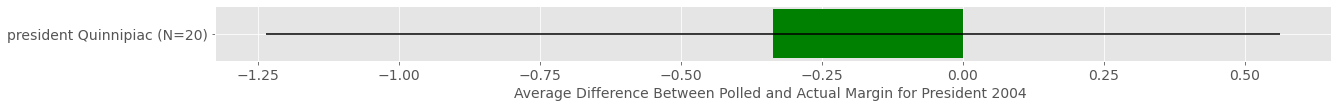

-
## Senate 2004 ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate  Quinnipiac          -11.625000           -6.090902   

   margin_diff_mean  polled_margin_count  
0         -5.534098                   20  
(1, 6)


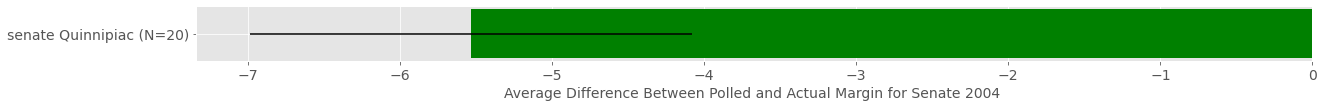

-
## Governor 2004 ##
-
## Gcb 2004 ##
-
## President 2002 ##
-
## Senate 2002 ##
-
## Governor 2002 ##
   election   pollster2  polled_margin_mean  actual_margin_mean  \
0  governor  Quinnipiac           19.000000            9.121227   

   margin_diff_mean  polled_margin_count  
0          9.878773                    2  
(1, 6)


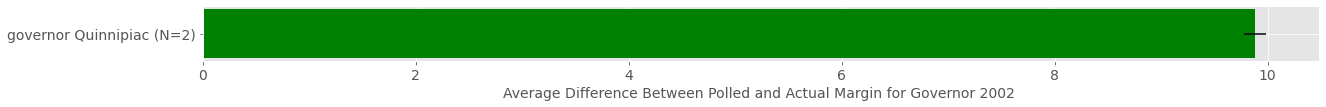

-
## Gcb 2002 ##
-
## President 2000 ##
-
## Senate 2000 ##
-
## Governor 2000 ##
-
## Gcb 2000 ##
-


In [123]:
def filter_pollsters(p):
    pollsters = ['Quinnipiac', 'Trafalgar', 'YouGov']
    for p_ in pollsters:
        if p_ in p:
            return p_
    return 'NA'

polls['pollster2'] = polls['pollster'].apply(filter_pollsters)


for y in [2020, 2018, 2016, 2014, 2012, 2008, 2004, 2002, 2000]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['pollster2'] != 'NA'], grouper=['pollster2'], election=p, year=y, show_bias=True, count_filter=1)
        print('-')

## President ##
    election   pollster2  polled_margin_mean  actual_margin_mean  \
0  president  Quinnipiac            4.932292            2.807422   
1  president      YouGov            1.023478            0.800987   
2  president   Trafalgar           -1.891429           -0.341502   

   margin_diff_mean  polled_margin_count  
0          2.124870                   96  
1          0.222491                  115  
2         -1.549927                   28  
(3, 6)


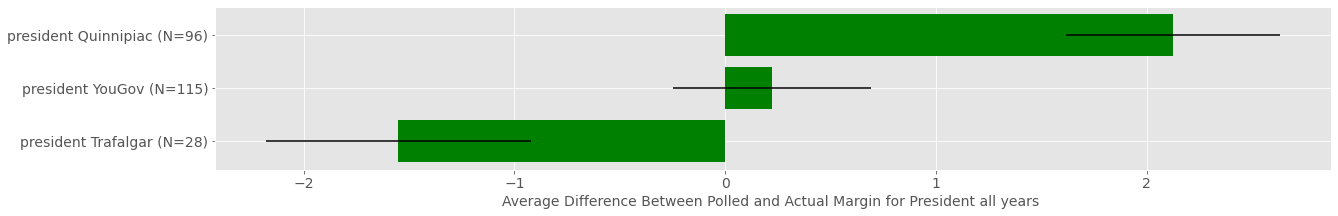

-
## Senate ##
  election   pollster2  polled_margin_mean  actual_margin_mean  \
0   senate      YouGov           -0.012598           -0.037833   
1   senate  Quinnipiac           -1.743902           -1.501626   
2   senate   Trafalgar           -0.427778            1.711742   

   margin_diff_mean  polled_margin_count  
0          0.025234                  127  
1         -0.242276                   82  
2         -2.139520                   18  
(3, 6)


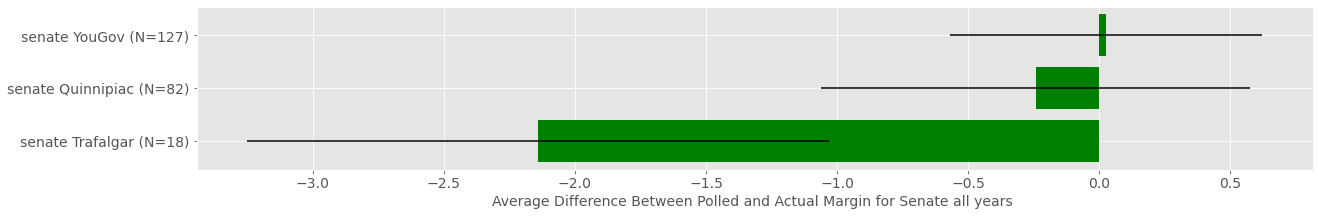

-
## Governor ##
   election   pollster2  polled_margin_mean  actual_margin_mean  \
0  governor  Quinnipiac           -0.170213           -1.678469   
1  governor      YouGov           -2.215385           -2.640570   
2  governor   Trafalgar           -4.683333           -1.643333   

   margin_diff_mean  polled_margin_count  
0          1.508256                   47  
1          0.425185                   65  
2         -3.040000                    6  
(3, 6)


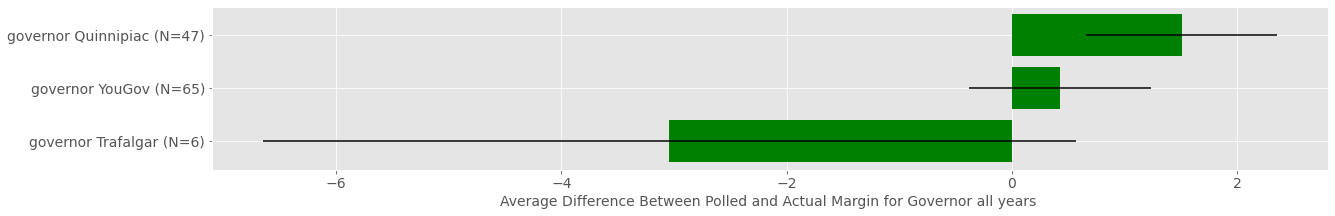

-
## Gcb ##
  election pollster2  polled_margin_mean  actual_margin_mean  \
0      GCB    YouGov            8.666667            4.409524   

   margin_diff_mean  polled_margin_count  
0          4.257143                   21  
(1, 6)


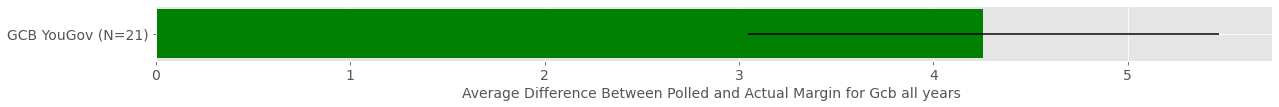

-


In [124]:
for p in ['president', 'senate', 'governor', 'GCB']:
    print('## {} ##'.format(p.title()))
    plot_polls(polls[polls['pollster2'] != 'NA'], grouper=['pollster2'], election=p, year='all', show_bias=True, count_filter=1)
    print('-')

    pollster2  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  Quinnipiac            1.433333            0.299961          1.133373   
1      YouGov            0.469817            0.025219          0.444598   
2   Trafalgar           -1.706923            0.219025         -1.925948   

   polled_margin_count  
0                  225  
1                  328  
2                   52  
(3, 5)


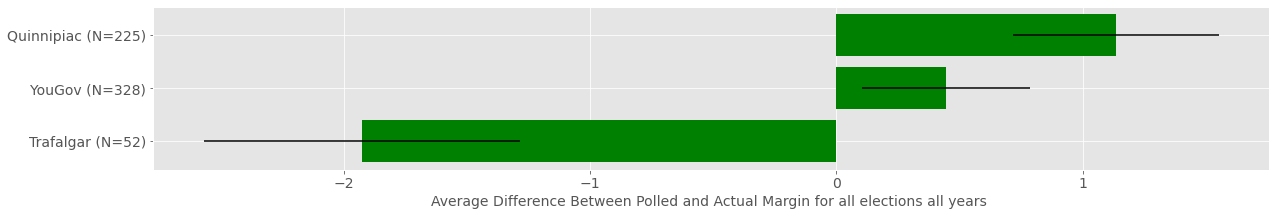

In [125]:
plot_polls(polls[polls['pollster2'] != 'NA'], grouper=['pollster2'], election='all', year='all', show_bias=True, count_filter=1)